**1. feladat**

(a) Írjon egy olyan python szkriptet, amely bekér a felhasználótól egy karaktersort (stringet), és amennyiben a felhasználó azt írta be, hogy "Szia!", a szkript kiírja, hogy "Hello!"

(b) Bővítse ki az előbbi szkriptet olyan módon, hogy a "Hogy vagy?" kérdésre a szkript "Köszi jól, és te?" kiírásával válaszoljon, a "Nehéz napom volt"-ra pedig "Sajnálom, szeretnél beszélni róla?" kérdést tegye fel!

(c) Fejlessze tovább a szkriptet, hogy ne csak a helyesen gépelt "Szia!"-ra válaszoljon, hanem a "Hello!"-ra, "Hello"-ra, "Helo"-ra, "Hi"-ra és "Hi!"-ra is.


In [ ]:


greetings = ["Szia!", "Hello!", "Hello", "Helo", "Hi", "Hi!"]

while True:
    user_input = input()

    if user_input == "bye":
        break;
    if user_input in greetings:
        print("Hello!")
    elif user_input == "Hogy vagy?":
        print("Köszi jól, és te?")
    elif user_input == "Nehéz napom volt":
        print("Sajnálom, szeretnél beszélni róla?")



Hello!
Hello!
Hogy vagy?
Köszi jól, és te?
Nehéz napom volt
Sajnálom, szeretnél beszélni róla?
nope
/bye
bye


**Figyelem!** A következő két feladat a constraint satisfaction programming (CSP) témakörébe tartozik. Mi nem foglalkozunk ezzel a témakörrel részletesebben, csak az a célunk, hogy azt demonstráljuk, hogy a nagy számítási kapacitás intelligensnek tűnő viselkedésre vezethet. Ezért az alábbi feladatokat is "egyszerű felsorolással" oldjuk meg. A CSP témaköre iránt érdeklődőknek ajánljuk Russel és Norvig mesterséges intelligencia könyvét.

**2. feladat**

SEND + MORE = MONEY

Ebben a kifejezesben minden betű (S, E, N, D, M, O, R, Y) egy-egy számjegynek felel meg. Különböző számjegyeket különböző betűk kódolnak.

(a) Határozza meg, M értékét!

(b) Írjon egy-egy függvényt (összesen hármat), melyek a SEND, MORE, és MONEY kifejezések értékeit határozzák meg az egyes számjegyedket kódoló betűk értékeitől függően. Ha például S=4, E=6, N=2, D=0, akkor send_erteke függvény elvárt kimenete: 4642.

(c) A (b) részfeladatban megírt függvények felhasználásával írjon egy olyan függvényt, amely eldönti, hogy a számjegyeket kódoló betűk adott értékei mellett teljesül-e, hogy SEND + MORE = MONEY.

(d) Sorolja fel az egyes betűk lehetséges értékeit, és találja meg azt a kombinációt, amely mellett SEND + MORE = MONEY teljesül. Írassa ki ebben az esetben az egyes betűk értékeit!

In [ ]:
def send_erteke(S,E,N,D):
  return S*1000 + E*100 + N*10 + D

def more_erteke(M,O,R,E):
  return M*1000 + O*100 + R*10 + E

def money_erteke(M,O,N,E,Y):
  return M*10000 + O*1000 + N*100 + E*10 + Y

def helyes_e(S,E,N,D,M,O,R,Y):
  return send_erteke(S,E,N,D) + more_erteke(M,O,R,E) == money_erteke(M,O,N,E,Y)

In [ ]:
import itertools

def solve_with_permutations():
    letters = "SENDMORY"

    for perm in itertools.permutations(range(10), len(letters)):
        mapping = dict(zip(letters, perm))
        # print(mapping)

        if mapping["S"] == 0 or mapping["M"] == 0:
            continue

        S = mapping["S"]
        E = mapping["E"]
        N = mapping["N"]
        D = mapping["D"]
        M = mapping["M"]
        O = mapping["O"]
        R = mapping["R"]
        Y = mapping["Y"]

        if helyes_e(S, E, N, D, M, O, R, Y):
            print("Solution found!")
            print("S =", S)
            print("E =", E)
            print("N =", N)
            print("D =", D)
            print("M =", M)  # M = 1.
            print("O =", O)
            print("R =", R)
            print("Y =", Y)
            print("SEND =", send_erteke(S, E, N, D))
            print("MORE =", more_erteke(M, O, R, E))
            print("MONEY =", money_erteke(M, O, N, E, Y))
            break;

solve_with_permutations()


Solution found!
S = 9
E = 5
N = 6
D = 7
M = 1
O = 0
R = 8
Y = 2
SEND = 9567
MORE = 1085
MONEY = 10652


In [ ]:
def solve_with_backtrack():
    letters = "SENDMORY"
    current_mapping = {}
    used_digits = [False]*10

    def backtrack(i):
        if i == len(letters):
            S = current_mapping['S']
            E = current_mapping['E']
            N = current_mapping['N']
            D = current_mapping['D']
            M = current_mapping['M']
            O = current_mapping['O']
            R = current_mapping['R']
            Y = current_mapping['Y']
            if S == 0 or M == 0:
                return None
            if helyes_e(S, E, N, D, M, O, R, Y):
                return current_mapping.copy()
            return None

        current_letter = letters[i]
        for d in range(10):
            if used_digits[d]:
                continue
            if current_letter in ('S', 'M') and d == 0:
                continue

            current_mapping[current_letter] = d
            used_digits[d] = True

            result = backtrack(i + 1)
            if result is not None:
                return result

            used_digits[d] = False

        return None

    return backtrack(0)

solution = solve_with_backtrack()
if solution is not None:
    print("Solution found!")
    for letter, digit in solution.items():
        print(f"{letter} = {digit}")
    print(f"SEND:  {send_erteke(solution['S'],solution['E'],solution['N'],solution['D'])}")
    print(f"MORE:  {more_erteke(solution['M'],solution['O'],solution['R'],solution['E'])}")
    print(f"MONEY:  {money_erteke(solution['M'],solution['O'],solution['N'],solution['E'],solution['Y'])}")
else:
    print("No solution found.")

Solution found!
S = 9
E = 5
N = 6
D = 7
M = 1
O = 0
R = 8
Y = 2
SEND:  9567
MORE:  1085
MONEY:  10652


**3. feladat** - Rubik kocka (2x2) kirakása

(a) Definiáljon numerikus "konstansokat" konstansokat, amelyek a Rubik kockán megtalálható színeket (vörös, narancs, sárga, zöld, kék, fehér) reprezentálják!

In [38]:
VOROS = 0
NARANCS = 1
SARGA = 2
ZOLD = 3
KEK = 4
FEHER = 5

(b) A kocka egy oldalának aktuális állapotát egy 4 hosszúságú listával fogjuk leírni. Tegyük fel, hogy a felső oldalon a következő színek láthatóak, definiáljon egy ennek megfelelő listát!


```
+-----------+------------+
|           |            |
|   FEHER   |   VOROS    |
|    (0)    |    (1)     |
+-----------+------------+
|           |            |
|   FEHER   |   VOROS    |
|    (2)    |    (3)     |
+-----------+------------+
```



In [37]:
felso_oldal = [5,0,5,0]

(c) Írja le a kocka többi oldalának állapotát is az előzőhöz hasonló módon! Az alábbi ábra szemlélteti, hogy az egyes oldalokon lévő mezők az oldalaknak megfelelő lista hányadik elemének felelnek meg.
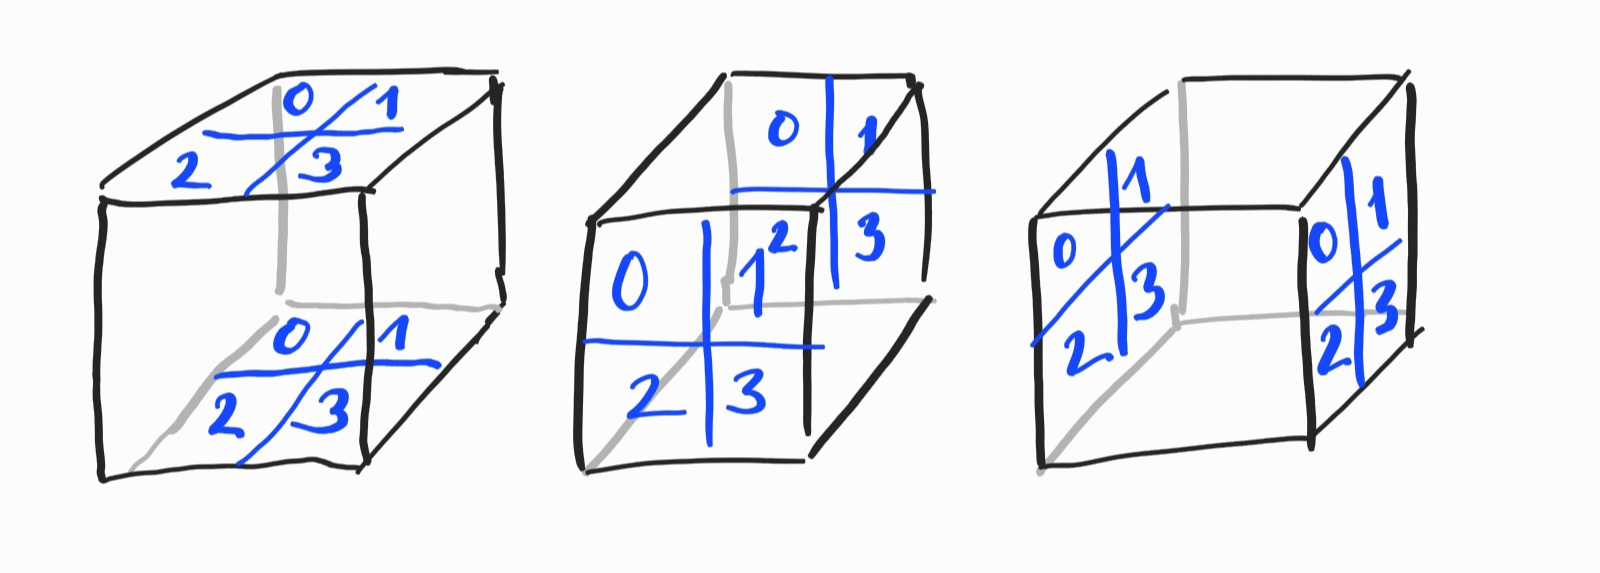

In [40]:
# VOROS = 0
# NARANCS = 1
# SARGA = 2
# ZOLD = 3
# KEK = 4
# FEHER = 5

felso_oldal = [5,0,5,0]
elulso_oldal = [0,2,0,2]
bal_oldal = [2,2,2,2]
hatso_oldal = [1,5,1,5]
jobb_oldal = [4,4,4,4]
also_oldal = [2,1,2,1]

(d) Sorszámozzuk meg a kocka oldalait: szemből nézve a felső oldal legyen a 0-dik oldal, az elülső oldal legyen az 1-es, a bal oldal a 2-es, a hátsó oldal a 3-as, a jobb oldal a 4-es, az alsó oldal pedig az 5-ös. A kocka aktuális állapotát egy olyan listával fogjuk leírni, amelynek minden elem maga is egy lista. A kocka állapotát leíró lista 0-dik eleme a felső oldalt reprezentáló lista, 1-dik eleme az elülső oldalt reprezentáló lista, stb. Írja le a fentiek szerint a kocka aktuális állapotát!

In [42]:
# oldal[0] = felso
# oldal[1] = elso
# oldal[2] = bal
# oldal[3] = hatso
# oldal[4] = jobb
# oldal[5] = also
kocka_allapota = [
    felso_oldal,
    elulso_oldal,
    bal_oldal,
    hatso_oldal,
    jobb_oldal,
    also_oldal
]

print(kocka_allapota)

[[5, 0, 5, 0], [0, 2, 0, 2], [2, 2, 2, 2], [1, 5, 1, 5], [4, 4, 4, 4], [2, 1, 2, 1]]


(e) Írjon egy függvényt, amely egy oldalról eldönti, hogy csupa azonos szín található-e az adott oldalon. A függvény bemente tehát egy oldal állapotát reprezentáló 4 hosszú lista, a kimenete pedig True vagy False attól függően, hogy mind a négy szín azonos-e.

In [43]:
def azonos_szinek(oldal):
    if oldal[0] == oldal[1] == oldal[2] == oldal[3]:
        return True
    else:
        return False

(f) Írjon egy függvényt, amely eldönti, hogy a kocka akutális állapota megfelel-e a kirakott állapotnak, azaz minden oldalon csupa azonos szín van-e!

In [44]:
def kirakott(kocka_allapota):
    for oldal in kocka_allapota:
        if not azonos_szinek(oldal):
            return False
    return True

(g) A következőkben írunk egy függvényt, amely a kocka adott állapotából kiindulva kiszámolja a kocka új állapotát a vízszintes (x) tengely körül történő "előre" forgatás után! Tekintse úgy, hogy a kocka jobb oldalát forgatjuk el előre, a bal oldala pedig helyben marad. Egészítse ki a megkezdett függvényt!

In [45]:
def forgatas_x_elore(kocka_allapota0):
  felso_oldal0, elulso_oldal0, bal_oldal0, hatso_oldal0, jobb_oldal0, also_oldal0 = kocka_allapota0

  jobb_oldal1 = [jobb_oldal0[2], jobb_oldal0[0],  jobb_oldal0[3], jobb_oldal0[1]]
  bal_oldal1 = bal_oldal0
  felso_oldal1 = [felso_oldal0[0], elulso_oldal0[1], felso_oldal0[2], elulso_oldal0[3]]
  elulso_oldal1 = [elulso_oldal0[0], also_oldal0[1], elulso_oldal0[2], also_oldal[3]]
  also_oldal1 = [also_oldal0[0], hatso_oldal0[1], also_oldal0[2], hatso_oldal0[3]]
  hatso_oldal1 = [hatso_oldal0[0], felso_oldal0[1], hatso_oldal0[2], felso_oldal0[3]]

  return [felso_oldal1, elulso_oldal1, bal_oldal1, hatso_oldal1, jobb_oldal1, also_oldal1  ]

(h) Írjon egy függvényt, amely a kocka adott állapotából kiindulva kiszámolja a kocka új állapotát a vízszintes (x) tengely körül történő "visszafelé" forgatás után! Tekintse úgy, hogy a kocka jobb oldalát forgatjuk el visszafelé, a bal oldala pedig helyben marad.


In [ ]:
def forgatas_x_hatra(kocka_allapota):
    kocka_1 = forgatas_x_elore(kocka_allapota)
    kocka_2 = forgatas_x_elore(kocka_1)
    kocka_3 = forgatas_x_elore(kocka_2)
    return kocka_3

A következőkben definiáljuk a többi forgatás esetén a kocka új állapotát megadó függvényeket.

In [ ]:
# y tengely felfele mutat, az y körül forgatunk, a kocka felső felét forgatjuk el
def forgatas_y_oramutato_jarasa_szerint(kocka_allapota0):
  felso_oldal0, elulso_oldal0, bal_oldal0, hatso_oldal0, jobb_oldal0, also_oldal0 = kocka_allapota0

  jobb_oldal1 = [hatso_oldal0[1], hatso_oldal0[0],  jobb_oldal0[2], jobb_oldal0[3]]
  bal_oldal1 = [elulso_oldal0[1] , elulso_oldal0[0], bal_oldal0[2], bal_oldal0[3]]
  felso_oldal1 = [felso_oldal0[2], felso_oldal0[0], felso_oldal0[3], felso_oldal0[1]]
  elulso_oldal1 = [jobb_oldal0[0], jobb_oldal0[1], elulso_oldal0[2], elulso_oldal0[3]]
  also_oldal1 = [also_oldal0[0], also_oldal0[1], also_oldal0[2], also_oldal0[3]]
  hatso_oldal1 = [bal_oldal0[0], bal_oldal0[1], hatso_oldal0[2], hatso_oldal0[3]]

  return [felso_oldal1, elulso_oldal1, bal_oldal1, hatso_oldal1, jobb_oldal1, also_oldal1]

In [ ]:
def forgatas_y_oramutato_jarasaval_ellentetes(kocka_allapota):
    kocka_1 = forgatas_y_oramutato_jarasa_szerint(kocka_allapota)
    kocka_2 = forgatas_y_oramutato_jarasa_szerint(kocka_1)
    kocka_3 = forgatas_y_oramutato_jarasa_szerint(kocka_2)
    return kocka_3

In [ ]:
# z tengely "hátrafelé" mutat, z körül forgatunk, a kocka első felét forgatjuk el

def forgatas_z_oramutato_jarasa_szerint(kocka_allapota0):
  felso_oldal0, elulso_oldal0, bal_oldal0, hatso_oldal0, jobb_oldal0, also_oldal0 = kocka_allapota0

  jobb_oldal1 = [felso_oldal0[2], jobb_oldal0[1], felso_oldal0[3], jobb_oldal0[3]]
  bal_oldal1 = [also_oldal0[2] , bal_oldal0[1], also_oldal0[3], bal_oldal0[3]]
  felso_oldal1 = [felso_oldal0[0], felso_oldal0[1], bal_oldal0[2], bal_oldal0[0]]
  elulso_oldal1 = [elulso_oldal0[2], elulso_oldal0[0], jobb_oldal0[3], jobb_oldal0[1]]
  also_oldal1 = [also_oldal0[0], also_oldal0[1], jobb_oldal0[2], jobb_oldal0[0]]
  hatso_oldal1 = [hatso_oldal0[0], hatso_oldal0[1], hatso_oldal0[2], hatso_oldal0[3]]

  return [felso_oldal1, elulso_oldal1, bal_oldal1, hatso_oldal1, jobb_oldal1, also_oldal1]

In [ ]:
def forgatas_z_oramutato_jarasaval_ellentetes(kocka_allapota):
    kocka_1 = forgatas_z_oramutato_jarasa_szerint(kocka_allapota)
    kocka_2 = forgatas_z_oramutato_jarasa_szerint(kocka_1)
    kocka_3 = forgatas_z_oramutato_jarasa_szerint(kocka_2)
    return kocka_3

(i) Definiáljon egy listát "forgatasok" néven, amely tartalmazza az előbb definiált 6 forgatási függvényt!

In [ ]:
forgatasok = # ...IDE JÖN A KÓD...

(j) Definiáljon egy listát, amely az előbbi forgatásokhoz kapcsolódó utasításokat tartalmazza ember számára érthető (szöveges) formában!


In [ ]:
utasitasok = # ...IDE JÖN A KÓD...

A következő függvény rekurzívan bejárja a legfeljebb n darab forgatásból álló forgatássorozatokat. Ha talál egy olyat, amelyik a kocka kirakásához vezet, kilép és kiírja az utasításokat.

In [ ]:
def kirakas_legfeljebb_n_lepesben(kocka_allapota, eddigi_lepesek,
                                  eddigi_allapotok, n=10):
  if kirakott(kocka_allapota):
    print(eddigi_lepesek)
    return True
  else:
    if n > 0:
      for i in range(len(forgatasok)):
        forgatasi_fv = forgatasok[i]
        kocka_allapota1 = forgatasi_fv(kocka_allapota)
        if kocka_allapota1 not in eddigi_allapotok:
          eddigi_lepesek1 = eddigi_lepesek + utasitasok[i]
          eddigi_allapotok1 = eddigi_allapotok + [kocka_allapota1]
          siker = kirakas_legfeljebb_n_lepesben(kocka_allapota1,
                            eddigi_lepesek1, eddigi_allapotok1, n-1)
          if siker:
            return True
      return False
    else:
      return False

(k) Definiáljon egy olyan függvényt, amely az előzö függvényt felhasználva megkeresi a kockát kirakó legkevesebb forgatásból álló forgatássorozatot!

In [ ]:
def kirak(kocka_allapota):
  # ...IDE JÖN A KÓD...

In [ ]:
kirak(kocka_allapota)